<a href="https://colab.research.google.com/github/soumodeepsen/my-projects/blob/main/fcc_forum_pageviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original RepLit file [*](https://replit.com/join/vvntchmzbn-soumodeepsen)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

!wget https://raw.githubusercontent.com/soumodeepsen/datasets/main/fcc-forum-pageviews.csv

# Import data (Make sure to parse dates. Consider setting index column to 'date'.
import datetime
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date',parse_dates=['date'], date_parser=lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

# Clean data
df = df.loc[
            (df['value'] >= df['value'].quantile(0.025)) &
            (df['value'] <= df['value'].quantile(0.975))
]

--2022-07-19 11:56:36--  https://raw.githubusercontent.com/soumodeepsen/datasets/main/fcc-forum-pageviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22381 (22K) [text/plain]
Saving to: ‘fcc-forum-pageviews.csv’

fcc-forum-pageviews 100%[===================>]  21.86K  --.-KB/s    in 0s      

2022-07-19 11:56:36 (102 MB/s) - ‘fcc-forum-pageviews.csv’ saved [22381/22381]



In [2]:
df.count(numeric_only=True)

value    1238
dtype: int64

In [3]:
def draw_line_plot():
    # Draw line plot
    fig = plt.figure(figsize=(20,5))
    plt.plot(df.index, df['value'], color='red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.show()

  # Save image and return fig (don't change this part)
  #fig.savefig('line_plot.png')
    return fig

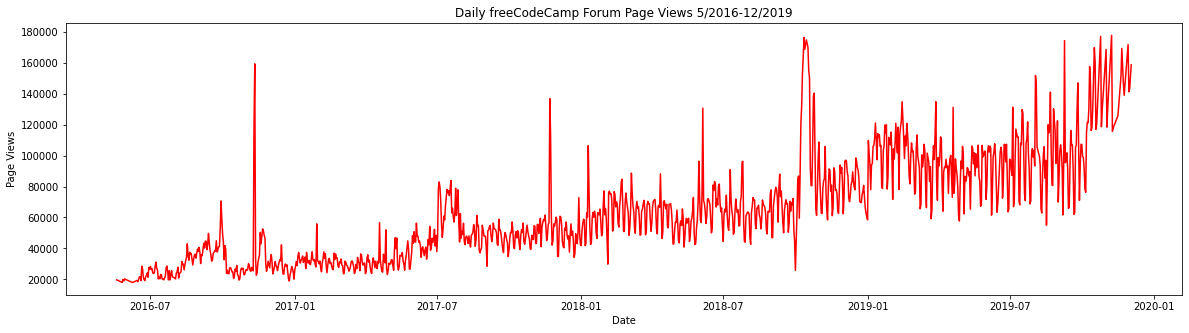

In [4]:
line_plot = draw_line_plot()

In [5]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = (
        df.copy()
        .groupby(pd.Grouper(freq="M"))
        .mean()
        .rename(columns={"value": "avg"})
    )

    df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
    df_bar["month"] = pd.DatetimeIndex(df_bar.index).strftime("%B")

    # Convert data to long form
    df_bar = pd.melt(
        df_bar,
        id_vars=["year", "month"],
        value_vars=["avg"],
    )

    sns.set_theme(style="ticks")

    # Draw the chart
    fig = sns.catplot(
        data=df_bar,
        x="year",
        y="value",
        hue="month",
        kind="bar",
        legend=False,
    )

    # Config legend, axes and title
    fig.set_xlabels("Years")
    fig.set_ylabels("Average Page Views")
    plt.legend(
        title="Months",
        loc="upper left",
        labels=[
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ],
    )
    return fig.fig

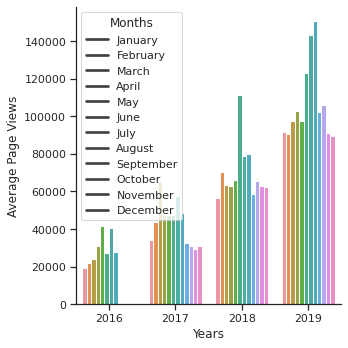

In [6]:
bar_plot = draw_bar_plot()

In [7]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)

    df_box["year"] = [d.year for d in df_box.date]
    df_box["month"] = [d.strftime("%b") for d in df_box.date]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])

    # Remember to edit the labels after call to seaborn.
    ax1.set(
        xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
    )

    sns.boxplot(
        ax=ax2,
        data=df_box,
        x=df_box["month"],
        y=df_box["views"],
        order=[
            "Jan",
            "Feb",
            "Mar",
            "Apr",
            "May",
            "Jun",
            "Jul",
            "Aug",
            "Sep",
            "Oct",
            "Nov",
            "Dec",
        ],
    )

    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")

    y_ticks = [
        "0",
        "20000",
        "40000",
        "60000",
        "80000",
        "100000",
        "120000",
        "140000",
        "160000",
        "180000",
        "200000",
    ]
    ax1.set_yticklabels(y_ticks)
    return fig

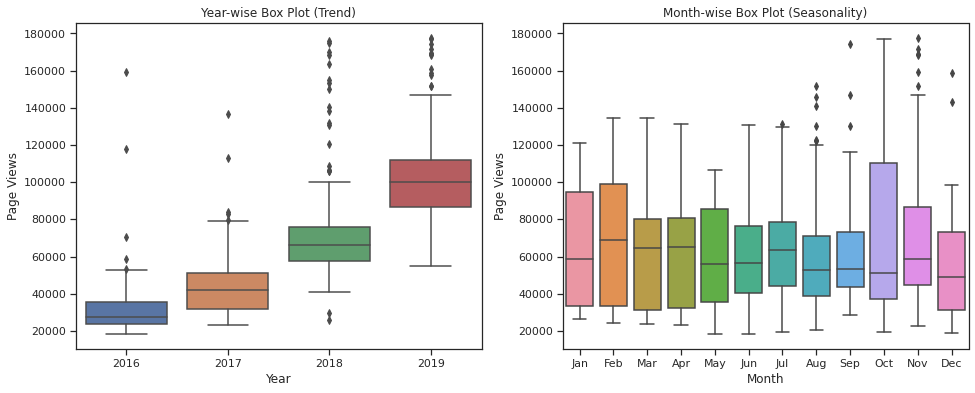

In [8]:
box_plot = draw_box_plot()